In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

In [13]:
%matplotlib inline

# Logistic_Regression

In [4]:
def get_data():
    df = pd.read_csv('./ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    # standardization
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    
    # One hot encoding
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t+D-1] = 1
    
    Z = np.zeros((N,4))
    Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # X2[:, -4:] = Z
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    return X2, Y

In [5]:
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

### Data

In [14]:
X, Y = get_binary_data()
X, Y = shuffle(X, Y)

Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

D = X.shape[1]
W = np.random.randn(D)
b = 0

In [15]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T * np.log(pY) + (1 - T)*np.log(1 - pY)
                )

In [16]:
train_costs = []
test_costs = []
learning_rate = 0.001

In [17]:
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classifcation rate: ", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classifcation rate: ", classification_rate(Ytest, np.round(pYtest)))

0 0.794215276918 0.79370481298
1000 0.645048370103 0.649058568264
2000 0.645048370103 0.649058546441
3000 0.645048370103 0.649058546441
4000 0.645048370103 0.649058546441
5000 0.645048370103 0.649058546441
6000 0.645048370103 0.649058546441
7000 0.645048370103 0.649058546441
8000 0.645048370103 0.649058546441
9000 0.645048370103 0.649058546441
Final train classifcation rate:  0.644295302013
Final test classifcation rate:  0.61


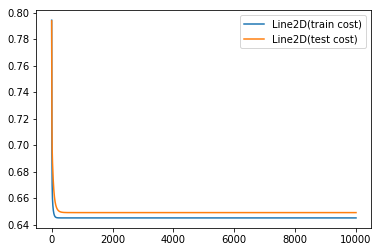

In [18]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])